# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm 
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import fiona
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")

In [2]:
hf = pd.read_csv('kc_house_data_train.csv')
zipfile = "Zip_Codes-shp"
street_map = gpd.read_file(zipfile)
crs = {'init': 'epsg:4326'}

In [3]:
len(hf)

17290

In [4]:
hf

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,...,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,...,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,...,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,...,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 540739.55 and sigma = 373308.18



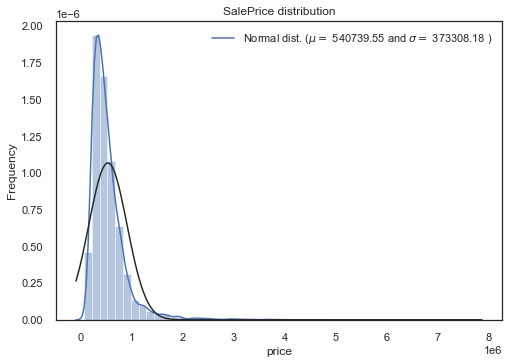

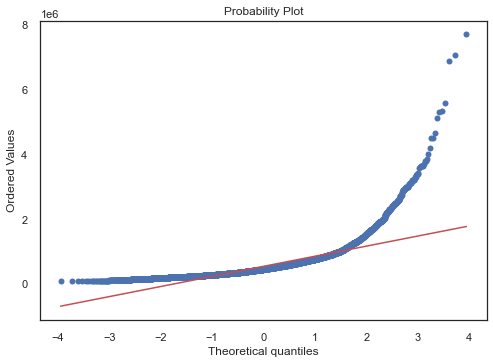

Skewness: 4.282599
Kurtosis: 38.520298


In [5]:
# Plot Histogram
sns.distplot(hf['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(hf['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(hf['price'], plot=plt)
plt.show()

print("Skewness: %f" % hf['price'].skew())
print("Kurtosis: %f" % hf['price'].kurt())

<AxesSubplot:>

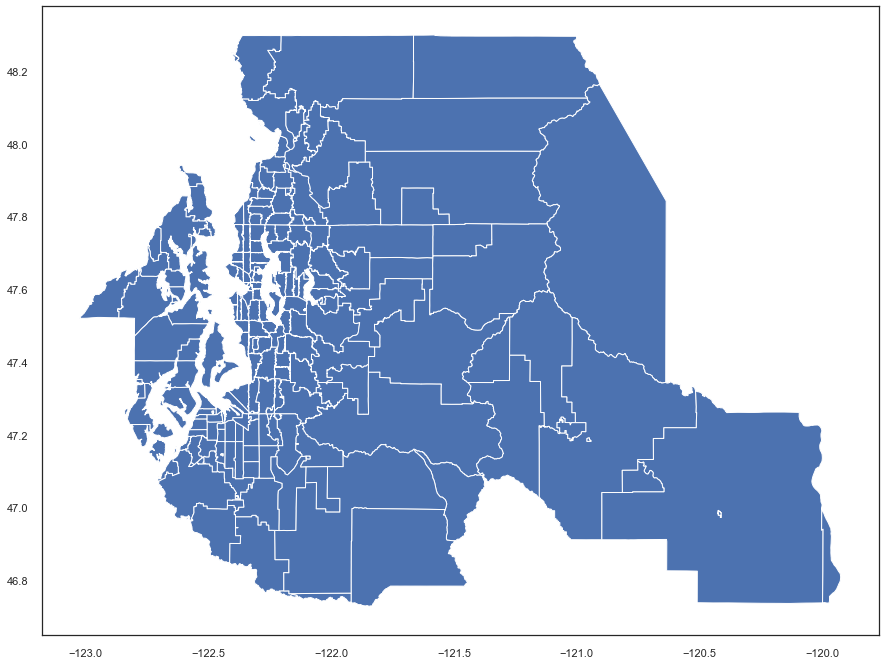

In [6]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)

In [7]:
hf.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
sqliv = hf.loc[hf['sqft_living'] <= 6850]
len(sqliv)

17260

In [9]:
sqlot = hf.loc[hf['sqft_lot'] <= 425000]
len(sqlot)

17260

In [ ]:
floors = hf.loc[hf['floors'] <= 3.0]
len(floors)

In [ ]:
view = hf.loc[hf['view'] >= 3]
len(view)

In [ ]:
cond = hf.loc[hf['condition'] >= 5 ]
len(cond)

In [ ]:
sqabove = hf.loc[hf['sqft_above'] <= 5800]
len(sqabove)

In [ ]:
sqliv15 = hf.loc[hf['sqft_living15'] <= 4820]
len(sqliv15)

In [ ]:
sqlot15 = hf.loc[hf['sqft_lot15'] <= 250000]
len(sqlot15)

In [ ]:
sqbase = hf.loc[hf['sqft_basement'] <= 2180]
len(sqbase)

In [ ]:
hf == 0

In [ ]:
hf[hf['bathrooms'] >= 5.5]

In [ ]:
geometry = [Point(xy) for xy in zip(hf['long'], hf['lat'])]
geometry[:3]

In [ ]:
geo_df = gpd.GeoDataFrame(hf,
                         crs = crs,
                         geometry = geometry)
geo_df.columns

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
# geo_df[geo_df['Unnamed: 0'] >= 1000].plot(ax=ax, markersize = 20, color = 'blue', marker = "^", label = "Housing ID")
# geo_df[geo_df['Unnamed: 0'] <= 1000].plot(ax=ax, markersize = 20, color = 'red', marker = "o", label = "Housing ID")
geo_df[geo_df['price'] <= 7000000].plot(ax=ax, markersize = 20, color = 'green', marker = "+", label = "Housing ID")




plt.legend(prop={'size': 15})

In [ ]:
hf.shape

In [ ]:
hf[500:540]

In [ ]:
hf.corr()

In [ ]:
plt.style.use('seaborn')
sns.set(style="white")

# Set up  matplotlib figure (might have to play around with the 
# figsize if your labels aren't so legible and you don't want
# to mess with the labels using matplotlib)
f, ax = plt.subplots(figsize=(10, 9))

# Create an upper triangular matrix to use to get rid of duplicate/
# useless values
mask = np.zeros_like(hf.corr())
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
with sns.axes_style("white"):
    ax = sns.heatmap(hf.corr(), mask=mask, square=True)
    
# fix for mpl bug that cuts off top/bottom of seaborn viz
# credit: https://github.com/mwaskom/seaborn/issues/1773 SalMac86's post
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [ ]:
price_corr = hf[hf.columns[:]].corr()['price'][:] 
price_corr.sort_values()

In [ ]:
plt.scatter(hf['bedrooms'], hf['bathrooms'], marker ='x');

In [ ]:
plt.scatter(hf['price'], hf['bedrooms'], marker = '^')

In [ ]:
plt.scatter(hf['condition'], hf['grade'], marker = '^')

In [ ]:
plt.plot(np.unique(hf['price']), np.poly1d(np.polyfit(hf['price'], hf['bedrooms'], 1))(np.unique(hf['price'])))

In [ ]:

sns.regplot(hf['price'],hf['bedrooms'], scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [ ]:
sns.regplot(hf['price'],hf['bathrooms'], scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [ ]:
hf[hf['sqft_living'] >= 12000]

In [ ]:
hf['yr_renovated'].unique()

In [ ]:
fig, axes = plt.subplots(7,2, figsize = (20, 20))


sns.boxplot(ax = axes[0,0], data = hf['bedrooms'], orient = 'h')
sns.boxplot(ax = axes[0,1], data = hf['bathrooms'], orient = 'h')
sns.boxplot(ax = axes[1,1], data = hf['sqft_living'], orient = 'h')
sns.boxplot(ax = axes[2,0], data = hf['sqft_lot'], orient = 'h')
sns.boxplot(ax = axes[2,1], data = hf['floors'], orient = 'h')
sns.boxplot(ax = axes[3,0], data = hf['grade'], orient = 'h')
sns.boxplot(ax = axes[3,1], data = hf['sqft_above'], orient = 'h')
sns.boxplot(ax = axes[4,0], data = hf['sqft_basement'], orient = 'h')
sns.boxplot(ax = axes[4,1], data = hf['yr_built'], orient = 'h')
sns.boxplot(ax = axes[5,0], data = hf['yr_renovated'], orient = 'h')
sns.boxplot(ax = axes[5,1], data = hf['zipcode'], orient = 'h')
sns.boxplot(ax = axes[6,0], data = hf['sqft_living15'], orient = 'h')
sns.boxplot(ax = axes[6,1], data = hf['sqft_lot15'], orient = 'h')


plt.show

In [ ]:
hf.describe()

In [ ]:
a = hf.zipcode.unique()
hf['geometry']

In [ ]:
print(sorted(a))

In [ ]:
hf.keys()

In [ ]:
numerical = ['price', 'sqft_living', 'sqft_lot', 'view',
             'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'
    
]

categorical = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade', 'zipcode'
    
]

houses = hf[numerical + categorical]

houses.shape

In [ ]:
sns.set_context('notebook', font_scale = 1.4)

sns.distplot(
    hf['price'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='price', ylabel='Count');

In [ ]:
hf[numerical].hist(bins=15, figsize=(30, 50), layout=(13, 2));


In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(30, 20))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(hf[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [ ]:
sns.jointplot(x=hf['sqft_living'], y=hf['sqft_living15']);


In [ ]:
sns.jointplot(x=hf['price'], y=hf['yr_built']);


In [ ]:

fig, ax = plt.subplots(4, 2, figsize=(30, 20))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='price', data=hf, ax=subplot)

In [ ]:
sorted_nb = hf.groupby(['zipcode'])['price'].median().sort_values()
sns.boxplot(x=hf['zipcode'], y=hf['price'], order=list(sorted_nb.index))

In [ ]:
def correlation_heatmap(hf1):
    _,ax=plt.subplots(figsize=(25,20))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(hf.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(hf)

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(20,15))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
sns.barplot(x='sqft_above',y='price',data=hf)

In [ ]:
nobed = (hf['bedrooms'] == 0 )

In [ ]:
hf[(hf['bathrooms'] == 2)]

#avgbathrooms = hf.loc[hf['bathrooms'] == 2].mean('bedrooms')
avgbathrooms =  hf.groupby(hf['bathrooms'] == 1)['bedrooms'].mean()
avgbathrooms[True]

In [ ]:
avgbathrooms =  hf.groupby('bathrooms', as_index=False)['bedrooms'].mean()
avgbathrooms

In [ ]:
(hf['sqft_living'] == 0)

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [10]:
hf.shape

(17290, 22)

In [11]:
def zero_val_bed_bath(row):
    """
    Checking extreame number of rooms in the house
    """
    if row['bedrooms'] == 0:
        row['bedrooms'] = row['floors']
    if row['bathrooms'] < 1:
        row['bathrooms'] = 1
    if row['bedrooms'] > 10 :
        row['bedrooms'] = 10
    return row

In [12]:
hf = hf.apply(zero_val_bed_bath, axis = 1)

In [13]:
hf.shape

(17290, 22)

In [14]:
hf.drop(columns = ['Unnamed: 0', 'id', 'view', 'sqft_living15', 'sqft_lot15'], inplace = True)

In [15]:
hf.shape

(17290, 17)

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [16]:
hf['yr_updated'] = np.nan

In [17]:
def yr_update(row):
    
    if row['yr_renovated'] == 0:
        row['yr_updated'] = 2021 - row['yr_built']
    if row['yr_renovated'] != 0:
        row['yr_updated'] = 2021 - row['yr_built']
        
    return row 
    

In [18]:
hf = hf.apply(yr_update, axis = 1)

In [19]:
hf['yr_ren'] = np.nan

In [20]:
def yr_ren(row):
    
    if row['yr_renovated'] == 0:
        row['yr_ren'] = 0
    if row['yr_renovated'] != 0:
        row['yr_ren'] = 2021 - row['yr_built']
        
    return row 

In [21]:
hf = hf.apply(yr_ren, axis = 1)

In [22]:
hf['percent_bedbath'] = np.nan
hf['has_golden_ratio'] = np.nan

In [23]:
# Based off of bathrooms pros and housetipster 

def ratio_bed_bath(row):
    
    ratio_bed_bath = row['bathrooms'] / row['bedrooms']
    golden_ratio = (2/3)
    row['percent_bedbath'] = abs(golden_ratio - ratio_bed_bath) 
    
    return row

In [24]:
hf = hf.apply(ratio_bed_bath, axis = 1)

In [25]:
def cal_ratio_range(row):
    golden_ratio = (2/3)
    golden_ratio_plus = golden_ratio + (golden_ratio * .10)
    golden_ratio_minus = golden_ratio - (golden_ratio * .10)
    
    if row['percent_bedbath'] <= golden_ratio_plus and row['percent_bedbath'] >= golden_ratio_minus:
            row['has_golden_ratio'] = 1
    else:
        row['has_golden_ratio'] = 0
    
    return row

In [26]:
hf = hf.apply(cal_ratio_range, axis = 1)

In [27]:
hf['ratio_liv_lot'] = np.nan

In [28]:
def ratio_living_lot(row):
    
    row['ratio_liv_lot'] = row['sqft_lot'] / row['sqft_living']
    return row
    

In [29]:
hf = hf.apply(ratio_living_lot, axis = 1)

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [30]:
hf = pd.concat([hf, pd.get_dummies(hf['zipcode'])], 1)

In [31]:
hf = hf.drop(columns = 'zipcode')

In [33]:
hf = pd.concat([hf, pd.get_dummies(hf['grade'])], 1)

In [34]:
hf = hf.drop(columns = 'grade')

In [35]:
hf.columns = hf.columns.astype(str)

In [36]:
# lowest g: 1
# low g: 3 Falls short of minimum building standards. Normally cabin or inferior structure.

# dnmc: 4 Generally older, low quality construction. Does not meet code.

# poor: 5 Low construction costs and workmanship. Small, simple design.

# bare_min: 6 Lowest grade currently meeting building code. Low quality materials and simple designs.

# average: 7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

# above_avg: 8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

# good: 9 Better architectural design with extra interior and exterior design and quality.

# high_qua: 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

# higher_qua: 11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

# excellent qua: 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

# mansion: 13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [37]:
hf = hf.rename(columns={'1': 'lowest_g', '3': 'low_g', '4':'dnmc', '5':'Poor', '6':'bare_min', 
                   '7':'average', '8':'above_avg', '9':'good', '10':'high_qua', '11':'higher_qua',
                   '12':'excellent_qua', '13':'mansion' })

In [38]:
hf.columns[60:110]

Index(['98092', '98102', '98103', '98105', '98106', '98107', '98108', '98109',
       '98112', '98115', '98116', '98117', '98118', '98119', '98122', '98125',
       '98126', '98133', '98136', '98144', '98146', '98148', '98155', '98166',
       '98168', '98177', '98178', '98188', '98198', '98199', 'lowest_g',
       'low_g', 'dnmc', 'Poor', 'bare_min', 'average', 'above_avg', 'good',
       'high_qua', 'higher_qua', 'excellent_qua', 'mansion'],
      dtype='object')

In [116]:
features = [
        'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'percent_bedbath', 'has_golden_ratio',
       'ratio_liv_lot', 'lowest_g',
       'low_g', 'dnmc', 'Poor', 'bare_min', 'average', 'above_avg', 'good',
       'high_qua', 'higher_qua', 'excellent_qua', 'mansion', '98001', '98002', 
       '98003', '98004', '98005', '98006',
       '98007', '98008', '98010', '98011', '98014', '98019', '98022', '98023',
       '98024', '98027', '98028', '98029', '98030', '98031', '98032', '98033',
       '98034', '98038', '98039', '98040', '98042', '98045', '98052', '98053',
       '98055', '98056', '98058', '98059', '98065', '98070', '98072', '98074',
       '98075', '98077', '98092', '98102', '98103', '98105', '98106', '98107',
       '98108', '98109', '98112', '98115', '98116', '98117',
       '98118', '98119', '98122', '98125', '98126', '98133', '98136', '98144',
       '98146', '98148', '98155', '98166', '98168', '98177', '98178', '98188',
       '98198', '98199']

hf_features = hf[features]
target = hf['price']

KeyError: "['waterfront'] not in index"

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [41]:
# your code here
hf['date'] = pd.to_datetime(hf['date'], format = '%Y/%m/%d')

In [42]:
hf.columns = hf.columns.astype(str)

In [43]:
hf['yr_ren']

0        0
1        0
2        0
3        0
4        0
        ..
17285    0
17286    0
17287    0
17288    0
17289    0
Name: yr_ren, Length: 17290, dtype: int64

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [44]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_basement', 'yr_ren', 'yr_updated']

poly_ft = hf[features]
target = hf['price']

In [99]:
def poly_df (df, degree):
    
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_data = poly.fit_transform(df)
    poly_columns = poly.get_feature_names(df.columns)
    df_poly = pd.DataFrame(poly_data, columns=poly_columns)
    return df_poly

In [100]:
poly_df = poly_df(poly_ft, 2)

In [50]:
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(df_poly, target)

In [51]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(df_poly, target, random_state=34,test_size=0.2)


In [52]:
#instantiate a linear regression object
lr_poly = LinearRegression()

#fit the linear regression to the data
lr_poly = lr_poly.fit(X_train_poly, y_train_poly)

In [53]:
train_preds = lr_poly.predict(X_train_poly)

In [54]:
train_rmse_poly = np.sqrt(metrics.mean_squared_error(y_train_poly, train_preds))

print('Root Mean Squared Error:' , train_rmse_poly)

Root Mean Squared Error: 232499.3262754003


### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [55]:
# your code here
# waterfront times sqft_lot
hf = pd.concat([hf, pd.get_dummies(hf['waterfront'])], 1)

In [56]:
hf = hf.rename(columns={0: "No_Waterfront", 1: "Waterfront"})

In [57]:
hf['water_sqft_lot'] = np.nan

In [58]:
def water_lot(row):
    if row['waterfront'] == 1:
        row['water_sqft_lot'] = row['Waterfront'] * row['sqft_lot'] 
    if row['waterfront'] == 0:
        row['water_sqft_lot'] = 0
    return row

In [59]:
hf = hf.apply(water_lot, axis=1)

In [60]:
hf = hf.drop(columns='waterfront')

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

In [61]:
hf.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'sqft_above', 'sqft_basement',
       ...
       'average', 'above_avg', 'good', 'high_qua', 'higher_qua',
       'excellent_qua', 'mansion', 'No_Waterfront', 'Waterfront',
       'water_sqft_lot'],
      dtype='object', length=104)

In [63]:
features = [
         'sqft_lot', 'floors',
        'condition', 'sqft_above',
       'yr_built', 'yr_renovated', 'percent_bedbath', 'has_golden_ratio',
       'ratio_liv_lot', 'lowest_g',
       'low_g', 'dnmc', 'Poor', 'bare_min', 'average', 'above_avg', 'good',
       'high_qua', 'higher_qua', 'excellent_qua', 'mansion', '98001', '98002', 
       '98003', '98004', '98005', '98006',
       '98007', '98008', '98010', '98011', '98014', '98019', '98022', '98023',
       '98024', '98027', '98028', '98029', '98030', '98031', '98032', '98033',
       '98034', '98038', '98039', '98040', '98042', '98045', '98052', '98053',
       '98055', '98056', '98058', '98059', '98065', '98070', '98072', '98074',
       '98075', '98077', '98092', '98102', '98103', '98105', '98106', '98107',
       '98108', '98109', '98112', '98115', '98116', '98117',
       '98118', '98119', '98122', '98125', '98126', '98133', '98136', '98144',
       '98146', '98148', '98155', '98166', '98168', '98177', '98178', '98188',
       '98198', '98199', 'No_Waterfront', 'Waterfront', 'water_sqft_lot']

hf_features = hf[features]
target = hf['price']

### 5.1) Perform a train-test split of the data.

In [64]:
def model_test(df, features, target):
    df_features = df[features]
    X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)
    #instantiate a linear regression object
    lm = linear_model.LinearRegression()

    #fit the linear regression to the data
    lm = lm.fit(X_train, y_train)
    
    y_train_pred = lm.predict(X_train)
    
    train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
    train_mse = metrics.mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
   
    # Test Set
    y_pred = lm.predict(X_test)
    
    #test_mae = metrics.mean_absolute_error(y_test, y_pred)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

    #print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
    #print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
    print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

In [65]:
model_test(hf, features, target)

Training:  165070 vs. Testing:  57259600787


### 5.2) Fit your scaler to training the data.

In [101]:
not_poly_fts = [x for x in hf.columns if x not in poly_df]

In [117]:
hf = pd.merge(poly_df, hf[not_poly_fts], left_index=True, right_index=True)

In [67]:
hf.shape

(17290, 121)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(hf, target, random_state=34,test_size=0.2)

In [125]:
X_train.select_dtypes(include=["number"]).columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_basement', 'yr_ren',
       'yr_updated', 'bedrooms^2', 'bedrooms bathrooms',
       'bedrooms sqft_living', 'bedrooms sqft_basement',
       ...
       'average', 'above_avg', 'good', 'high_qua', 'higher_qua',
       'excellent_qua', 'mansion', 'No_Waterfront', 'Waterfront',
       'water_sqft_lot'],
      dtype='object', length=124)

In [126]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
scaled_data = scaler.transform(X_train)

TypeError: invalid type promotion

In [71]:
X_train_scaled = pd.DataFrame(data=scaled_data, columns=X_train.columns, index=X_train.index)

### 5.3) Transform the testing set with the scaler.

In [72]:
#your code here 
scaled_test_data = scaler.transform(X_test)

In [73]:
X_test_scaled = pd.DataFrame(data=scaled_test_data, columns=X_test.columns, index=X_test.index)

### 5.4) Fit the model to the training data.

In [74]:
#your code here 
#your code here 
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

### 5.5) Use the model to predict on the training set and the test set.

In [75]:
#your code here 
y_train_pred = lm.predict(X_train)

y_test_pred = lm.predict(X_test)

### 5.6) Evaluate the training and test predictions using RMSE.

In [76]:
#your code here 
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Training Root Mean Squared Error:' , train_rmse)
print('Test Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 144412.8258692642
Test Root Mean Squared Error: 373956.8787872929


### 5.7) Determine if your model is overfit.

In [77]:
model_percent = round(((train_rmse - test_rmse)/(train_rmse))*100, 2)

In [78]:
print("{}% difference".format(model_percent))

-158.95% difference


## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [121]:
# your code here
#F-test
X_train.shape

(13832, 125)

In [122]:
selector = SelectKBest(f_regression, k=70)

selector.fit(X_train, y_train)

TypeError: invalid type promotion

In [81]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [82]:
list(removed_columns)

['condition',
 'yr_built',
 'percent_bedbath',
 'ratio_liv_lot',
 'lowest_g',
 'low_g',
 'dnmc',
 'above_avg',
 '98007',
 '98008',
 '98010',
 '98011',
 '98014',
 '98019',
 '98024',
 '98027',
 '98028',
 '98029',
 '98032',
 '98034',
 '98045',
 '98052',
 '98053',
 '98056',
 '98059',
 '98065',
 '98070',
 '98072',
 '98074',
 '98077',
 '98103',
 '98107',
 '98108',
 '98109',
 '98115',
 '98116',
 '98117',
 '98118',
 '98122',
 '98125',
 '98126',
 '98136',
 '98144',
 '98146',
 '98148',
 '98155',
 '98166',
 '98177',
 '98188',
 'yr_updated',
 'yr_updated^2']

In [83]:
list(selected_columns)

['sqft_lot',
 'floors',
 'sqft_above',
 'yr_renovated',
 'has_golden_ratio',
 'Poor',
 'bare_min',
 'average',
 'good',
 'high_qua',
 'higher_qua',
 'excellent_qua',
 'mansion',
 '98001',
 '98002',
 '98003',
 '98004',
 '98005',
 '98006',
 '98022',
 '98023',
 '98030',
 '98031',
 '98033',
 '98038',
 '98039',
 '98040',
 '98042',
 '98055',
 '98058',
 '98075',
 '98092',
 '98102',
 '98105',
 '98106',
 '98112',
 '98119',
 '98133',
 '98168',
 '98178',
 '98198',
 '98199',
 'No_Waterfront',
 'Waterfront',
 'water_sqft_lot',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_basement',
 'yr_ren',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms sqft_living',
 'bedrooms sqft_basement',
 'bedrooms yr_ren',
 'bedrooms yr_updated',
 'bathrooms^2',
 'bathrooms sqft_living',
 'bathrooms sqft_basement',
 'bathrooms yr_ren',
 'bathrooms yr_updated',
 'sqft_living^2',
 'sqft_living sqft_basement',
 'sqft_living yr_ren',
 'sqft_living yr_updated',
 'sqft_basement^2',
 'sqft_basement yr_ren',
 'sqft_basement

In [84]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 159436.79048175667
Testing Root Mean Squared Error: 182021.57166922643


In [85]:
a = round((testK_rmse - trainK_rmse)/ (trainK_rmse)*100,2)

In [86]:
a

14.17

In [87]:
#REFECV
from sklearn.feature_selection import RFECV

In [88]:
ols = linear_model.LinearRegression()

In [89]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=2, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)


Fitting estimator with 121 features.
Fitting estimator with 119 features.
Fitting estimator with 117 features.
Fitting estimator with 115 features.
Fitting estimator with 113 features.
Fitting estimator with 111 features.
Fitting estimator with 109 features.
Fitting estimator with 107 features.
Fitting estimator with 105 features.
Fitting estimator with 103 features.
Fitting estimator with 101 features.
Fitting estimator with 99 features.
Fitting estimator with 97 features.
Fitting estimator with 95 features.
Fitting estimator with 93 features.
Fitting estimator with 91 features.
Fitting estimator with 89 features.


RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_absolute_error', step=2, verbose=1)

In [90]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [91]:
selected_rfe

Index(['yr_built', 'percent_bedbath', 'lowest_g', 'dnmc', 'Poor', 'bare_min',
       'average', 'above_avg', 'good', 'high_qua', 'higher_qua',
       'excellent_qua', 'mansion', '98001', '98002', '98003', '98004', '98005',
       '98006', '98007', '98008', '98010', '98011', '98014', '98019', '98022',
       '98023', '98024', '98027', '98028', '98029', '98030', '98031', '98032',
       '98033', '98034', '98038', '98039', '98040', '98042', '98045', '98052',
       '98053', '98055', '98056', '98058', '98059', '98065', '98070', '98072',
       '98074', '98075', '98077', '98092', '98102', '98103', '98105', '98106',
       '98107', '98108', '98109', '98112', '98115', '98116', '98117', '98118',
       '98119', '98122', '98125', '98133', '98136', '98144', '98146', '98148',
       '98155', '98166', '98168', '98177', '98178', '98188', '98198', '98199',
       'No_Waterfront', 'Waterfront', 'bathrooms', 'sqft_living',
       'yr_updated'],
      dtype='object')

In [92]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)



Training Root Mean Squared Error: 157243.71129438278
Testing Root Mean Squared Error: 162583.03160602748


In [93]:
b = round((testRFE_rmse - trainRFE_rmse)/ (trainRFE_rmse)*100,2)

In [94]:
b 

3.4

In [106]:
len(selected_rfe)

87

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [108]:
effect_feat = ['yr_built',
 'percent_bedbath',
 'lowest_g',
 'dnmc',
 'Poor',
 'bare_min',
 'average',
 'above_avg',
 'good',
 'high_qua',
 'higher_qua',
 'excellent_qua',
 'mansion',
 '98001',
 '98002',
 '98003',
 '98004',
 '98005',
 '98006',
 '98007',
 '98008',
 '98010',
 '98011',
 '98014',
 '98019',
 '98022',
 '98023',
 '98024',
 '98027',
 '98028',
 '98029',
 '98030',
 '98031',
 '98032',
 '98033',
 '98034',
 '98038',
 '98039',
 '98040',
 '98042',
 '98045',
 '98052',
 '98053',
 '98055',
 '98056',
 '98058',
 '98059',
 '98065',
 '98070',
 '98072',
 '98074',
 '98075',
 '98077',
 '98092',
 '98102',
 '98103',
 '98105',
 '98106',
 '98107',
 '98108',
 '98109',
 '98112',
 '98115',
 '98116',
 '98117',
 '98118',
 '98119',
 '98122',
 '98125',
 '98133',
 '98136',
 '98144',
 '98146',
 '98148',
 '98155',
 '98166',
 '98168',
 '98177',
 '98178',
 '98188',
 '98198',
 '98199',
 'No_Waterfront',
 'Waterfront',
 'bathrooms',
 'sqft_living',
 'yr_updated']

In [109]:
final_hf = hf[effect_feat]

In [110]:
final_hf.shape

(17290, 87)

## Step 7: Evaluate your different models in order to determine the best model overall.

In [113]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

alpha = 0.05 
#ANOVA Test Setup
formula = 'price~C(floors)'
lm_condition = smf.ols(formula, hf).fit()
anova_condition = sm.stats.anova_lm(lm_condition, type=2)
if anova_condition["PR(>F)"][0] < alpha:
    print("The number of floors has a statistically significant impact on average property value")
    print("Conditions F-statisic Probability: ", anova_condition["PR(>F)"][0])

The number of floors has a statistically significant impact on average property value
Conditions F-statisic Probability:  0.0


In [114]:
is_waterfront = hf[(hf['Waterfront'] == 1)]
waterfront_price = is_waterfront.price
no_waterfront = hf[(hf['Waterfront'] == 0)]
notwaterfront_price = no_waterfront.price
alpha = 0.05
waterfront_p_val = stats.ttest_ind(waterfront_price, notwaterfront_price, equal_var=False)[1]
print("Waterfront vs No Waterfront T-test P Value: ", waterfront_p_val)
if waterfront_p_val < alpha:
    print("The P value is less than alpha, reject null-hypothesis")

Waterfront vs No Waterfront T-test P Value:  6.940441256090536e-23
The P value is less than alpha, reject null-hypothesis


In [115]:
alpha = 0.05 
#ANOVA Test Setup
formula = 'price~C(bedrooms)'
lm_condition = smf.ols(formula, hf).fit()
anova_condition = sm.stats.anova_lm(lm_condition, type=2)
if anova_condition["PR(>F)"][0] < alpha:
    print("The number of bedrooms has a statistically significant impact on average property value")
    print("Conditions F-statisic Probability: ", anova_condition["PR(>F)"][0])

The number of bedrooms has a statistically significant impact on average property value
Conditions F-statisic Probability:  0.0


## Step 8:  Refit your best model to the entire dataset.

In [ ]:
scale_df.columns

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(final_hf)

In [ ]:
scaled_data = scaler.transform(final_hf)

In [ ]:
hf_features_scaled = pd.DataFrame(data=final_hf[selected_columns], columns=final_hf.columns, index=final_hf.index)

In [ ]:
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm.fit(scale_df[selected_columns], hf['price'])

In [111]:
    lm_final = LinearRegression()
#     #fit the linear regression to the data
    lm_final = lm_final.fit(final_hf, target)

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [112]:
import pickle


pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

# pickle_out = open('scaler.pickle', "wb")
# pickle.dump(scaler, pickle_out)
# pickle_out.close()

In [ ]:
selected_columns

In [ ]:
list(selected_rfe)